In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

LKB = pd.read_excel (r'C:\Users\HP\Dropbox\Chem UoB\DataDRtechniques.xlsx',
                    sheet_name='LKBPP screen dataset')

descriptors = ['homo', 'lumo', 'pa', 'homo2', 'lumo2', 'pa2', 'he.w.pn', 'nhe', 'be.gla', 'ml.gla', 'dmd.gla', 'd.d1rgla', 'd.d2rgla', 'drd1rgla', 
               'drd2rgla', 'nbo.glaf', 'be.pd', 'ml.pd', 'dmd.pd', 'd.d1r.pd', 'd.d2r.pd', 'd.rd1rpd', 'd.rd2rpd', 'nbo.pd.f', 'dppd.d1', 'dppd.d2', 
               'dpzn.d1', 'dpzn.d2']

#Substitution is the data of the new ligands

substitution = pd.read_excel (r'C:\Users\HP\Dropbox\Chem UoB\DataDRtechniques.xlsx',
                    sheet_name='Subs data')

In [2]:
# Scale the data
scaler = StandardScaler()
data_std = scaler.fit_transform(LKB[descriptors])

In [3]:
#Sacle the new data you want to add 
data_std_2 = scaler.fit_transform(substitution[descriptors])

In [4]:
#The model is generated (is the exact same model that has been used always)
vect_pca=PCA(n_components=7)
pca=vect_pca.fit_transform(data_std)

#The new data is transformed into the model
pca_new=vect_pca.transform(data_std_2)

pca_df_scale = pd.DataFrame(pca, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7'])
pca_new_df_scale = pd.DataFrame(pca_new, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7'])

In [5]:
concatenated_pca = pd.concat([pca_df_scale.assign(dataset='LKB-PP screen'), pca_new_df_scale.assign(dataset='Substitution')])

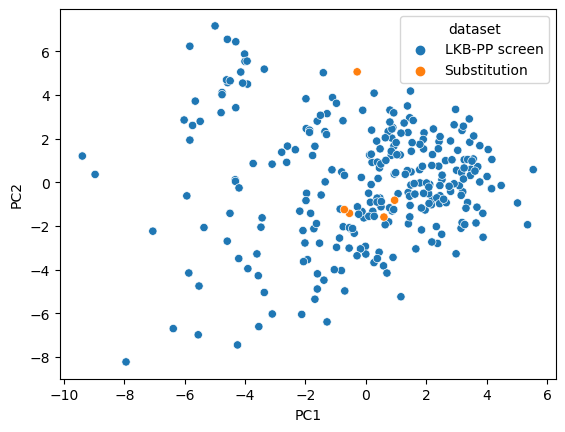

In [6]:
sns.scatterplot(x=-1*concatenated_pca['PC1'], y=-1*concatenated_pca['PC2'], data=concatenated_pca,
                hue='dataset')
plt.show()

In [26]:
#Change the number of neighbours for plots of 5, 10 and 15: 
import umap
vect_umap=umap.UMAP(n_neighbors=15,min_dist=0.5,n_components=10,random_state=42)
umap=vect_umap.fit_transform(data_std)

umap_new=vect_umap.transform(data_std_2)

umap_df_scale = pd.DataFrame(umap, columns=['umap1', 'umap2', 'umap3', 'umap4', 'umap5', 'umap6', 'umap7', 'umap8', 'umap9', 'umap10'])
umap_new_df_scale = pd.DataFrame(umap_new, columns=['umap1', 'umap2', 'umap3', 'umap4', 'umap5', 'umap6', 'umap7', 'umap8', 'umap9', 'umap10'])

In [27]:
concatenated_umap = pd.concat([umap_df_scale.assign(dataset='LKB-PP screen'), umap_new_df_scale.assign(dataset='Substitution')])

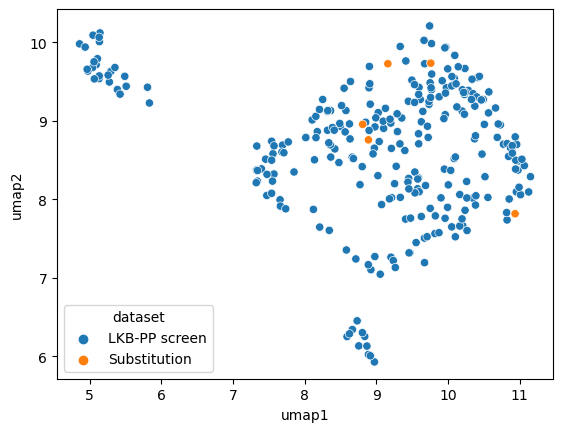

In [28]:
sns.scatterplot(x=concatenated_umap['umap1'], y=concatenated_umap['umap2'], data=concatenated_umap,
                hue='dataset')
plt.show()

In [12]:
vect_tsne=TSNE(n_components=10, verbose=0, perplexity=12, n_iter=5000, learning_rate="auto", method='exact', random_state=42)
tsne=vect_tsne.fit_transform(data_std)

tsne_new=vect_umap.transform(data_std_2)

tsne_df_scale = pd.DataFrame(tsne, columns=['tsne1', 'tsne2', 'tsne3','tsne4', 'tsne5', 'tsne6', 'tsne7', 'tsne8', 'tsne9', 'tsne10'])
tsne_new_df_scale = pd.DataFrame(tsne_new, columns=['tsne1', 'tsne2', 'tsne3','tsne4', 'tsne5', 'tsne6', 'tsne7', 'tsne8', 'tsne9', 'tsne10'])

In [13]:
concatenated_tsne = pd.concat([tsne_df_scale.assign(dataset='LKB-PP screen'), tsne_new_df_scale.assign(dataset='Substitution')])

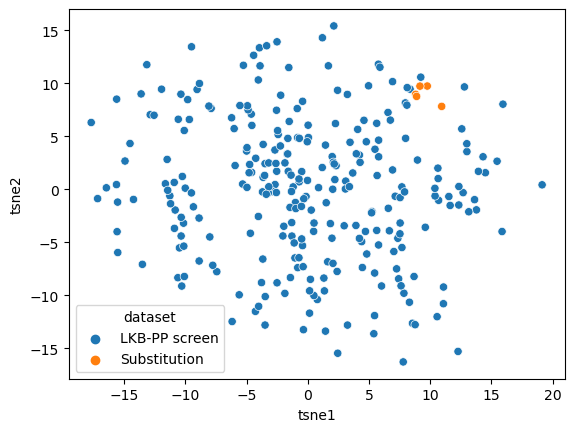

In [21]:
sns.scatterplot(x=concatenated_tsne['tsne1'], y=concatenated_tsne['tsne2'], data=concatenated_tsne,
                hue='dataset')
plt.show()